In [1]:
import numpy as np
import pylab as pb
import GPy
import copy as cp

import pickle

import matplotlib as mpl

pb.ion()

file_base = ""

In [2]:
X_raw = Y_raw = None
segment = False

if segment:
    backup_size = 5000
    file_ending = "_backup_i" + str(backup_size - 1) + "_G6_test.npy"
    X_raw = np.load(file_base + "hc" + file_ending,
        allow_pickle=True)
    Y_raw = np.load(file_base + "samples" + file_ending,
        allow_pickle=True)
    X_raw = X_raw[:backup_size]
    Y_raw = Y_raw[:backup_size]
else:
    #X_raw = np.load("hc_G6_test.npy", allow_pickle=True)
    #Y_raw = np.load("samples_G6_test.npy", allow_pickle=True)
    # What do the training errors look like now?
    X_raw = np.load("hc_G6_pred_r1.npy", allow_pickle=True)
    Y_raw = np.load("samples_G6_pred_r1.npy", allow_pickle=True)

In [3]:
scales = np.load("../standard_k.npy", allow_pickle=True)

In [4]:
def is_bad(row):
    if float('-inf') in row or float('inf') in row \
        or None in row or True in np.isnan(pspec) \
        or 0 in row:
        return True
    return False

bad_row_indices = []
for i in range(len(Y_raw)):
    pspec = Y_raw[i]
    if is_bad(pspec):
        bad_row_indices.append(i)

X = np.delete(X_raw, bad_row_indices, 0)
Y = np.delete(Y_raw, bad_row_indices, 0)

In [5]:
m = pickle.load(open("analyses/massive_emulator_G6_r1.nucomet", "rb"))

In [6]:
def inverse_transform(raw_prediction):
    return np.exp(raw_prediction * m.stdev + m.mu)

In [7]:
def nest(array):
    return np.array([np.array(array)])

(array([100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
        100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
        100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
        100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
        100., 100., 100., 100., 100., 100.]),
 array([1.15038399e-09, 1.22716653e-09, 1.30394908e-09, 1.38073162e-09,
        1.45751417e-09, 1.53429671e-09, 1.61107926e-09, 1.68786180e-09,
        1.76464434e-09, 1.84142689e-09, 1.91820943e-09, 1.99499198e-09,
        2.07177452e-09, 2.14855707e-09, 2.22533961e-09, 2.30212216e-09,
        2.37890470e-09, 2.45568724e-09, 2.53246979e-09, 2.60925233e-09,
        2.68603488e-09, 2.76281742e-09, 2.83959997e-09, 2.91638251e-09,
        2.99316505e-09, 3.06994760e-09, 3.14673014e-09, 3.22351269e-09,
        3.30029523e-09, 3.37707778e-09, 3.45386032e-09, 3.53064286e-09,
        3.60742541e-09, 3.68420795e-09, 3.76099050e-09, 3.83777304e-09,
        3.

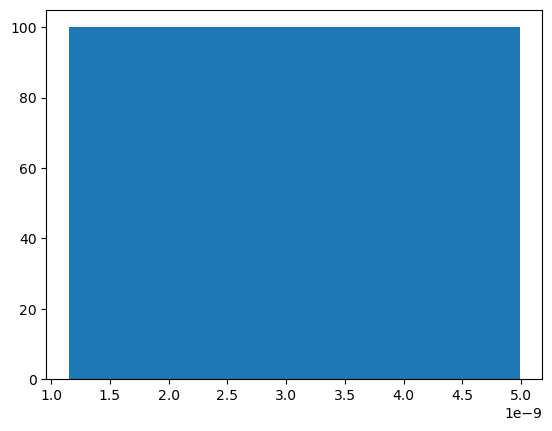

In [24]:
pb.hist(X[:, 4], bins=50)

In [20]:
preds = np.zeros(Y.shape)
rel_errors = np.zeros(Y.shape)

for i in range(len(X)):
    x = nest(X[i])
    print(x)
    raw_pred, _ = m.predict(x)
    preds[i] = inverse_transform(raw_pred)
    rel_errors[i] = (preds[i] - Y[i]) / Y[i]

[[2.30801850e-02 1.09367000e-01 9.46505000e-01 9.71918199e-01
  2.87296098e-09 8.20700000e-03]]
[[2.06441750e-02 9.20910000e-02 9.84053000e-01 8.62480113e-01
  4.68999938e-09 1.68300000e-03]]
[[2.17530450e-02 1.13273000e-01 9.34373000e-01 8.03920088e-01
  4.96493588e-09 9.23700000e-03]]
[[2.07806850e-02 9.07890000e-02 9.75215000e-01 6.22960057e-01
  3.92202034e-09 9.73500000e-03]]
[[2.19720450e-02 1.51927000e-01 9.76367000e-01 5.81360056e-01
  3.13100193e-09 1.22500000e-03]]
[[2.11376550e-02 1.46075000e-01 9.67583000e-01 6.63920162e-01
  1.86614045e-09 3.24100000e-03]]
[[2.18077950e-02 1.19965000e-01 9.59339000e-01 7.82000010e-01
  4.91885714e-09 8.46500000e-03]]
[[2.39116550e-02 1.43569000e-01 9.81839000e-01 4.26000000e-01
  1.68720134e-09 1.90000000e-05]]
[[2.41437950e-02 1.00323000e-01 9.25841000e-01 9.94242483e-01
  1.40688899e-09 8.83100000e-03]]
[[2.13070150e-02 1.22541000e-01 9.92693000e-01 5.89680033e-01
  4.37205606e-09 2.38700000e-03]]
[[2.08493050e-02 1.37297000e-01 1.002701

[2.30049950e-02 1.13553000e-01 9.98021000e-01 2.83280000e-01
 4.78062091e-09 9.88900000e-03]


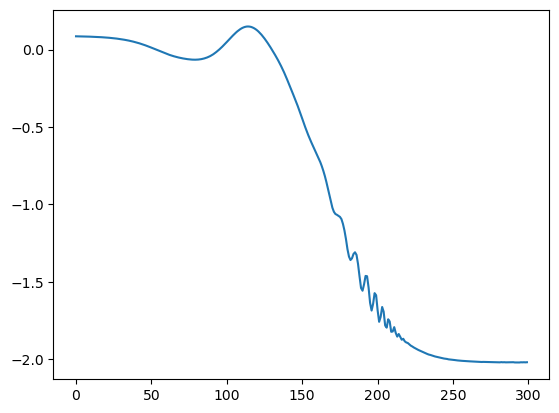

In [9]:
# An example of an extreme error plot, with the cosmology it was
# supposed to describe. 

pb.plot(rel_errors[900] * 100)
print(X[900])

In [10]:
min(X[:, 3])

0.2000799999579013

In [11]:
max(X[:, 3])

0.9999202176710023

In [12]:
def normalize(array):
    min_ = min(array)
    max_ = max(array)
    range_ = max_ - min_
    shifted = array - min_
    return shifted / range_

In [13]:
# Let's use the plasma color map
def plot_colored_errors(param_index, param_label, save_label=None):
    normalized_vals = normalize(X[:, param_index])
    colors = pb.cm.plasma(normalized_vals)

    for i in range(len(rel_errors)):
        if i % 1 == 0:
            pb.plot(scales, 100 * rel_errors[i],
                color=colors[i], alpha=0.05)
            pb.xscale('log')

    pb.title(r"Emulator G3, 5000 Random Massive-$\nu$ Models" + 
            "\ncolored by " + param_label + " value")
    pb.ylabel("% error between CAMB and CassL")
    pb.xlabel("scale $k$ [1 / Mpc]")
    norm = mpl.colors.Normalize(
        vmin=min(X[:, param_index]), vmax=max(X[:, param_index]))
    pb.colorbar(mpl.cm.ScalarMappable(cmap=pb.cm.plasma, norm=norm))
    if save_label is not None:
        pb.savefig("../plots/emulator/performance/" + save_label + ".png")

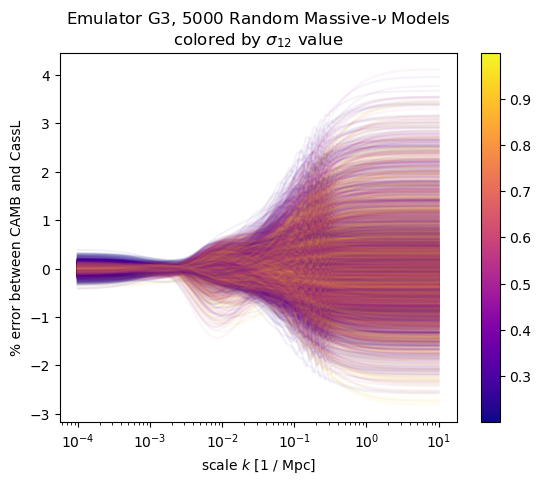

In [14]:
plot_colored_errors(3, r"$\sigma_{12}$")

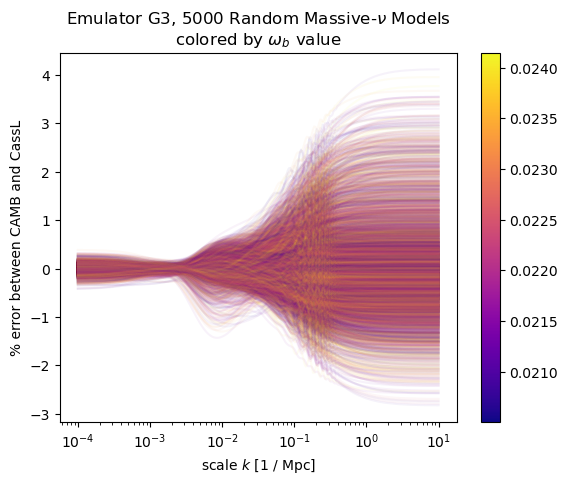

In [15]:
plot_colored_errors(0, r"$\omega_b$")

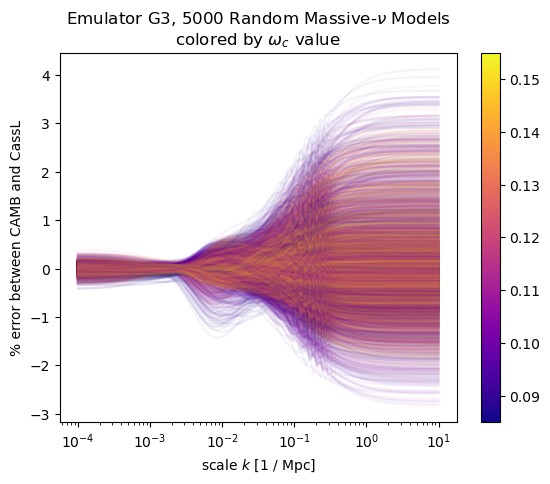

In [16]:
plot_colored_errors(1, r"$\omega_c$")

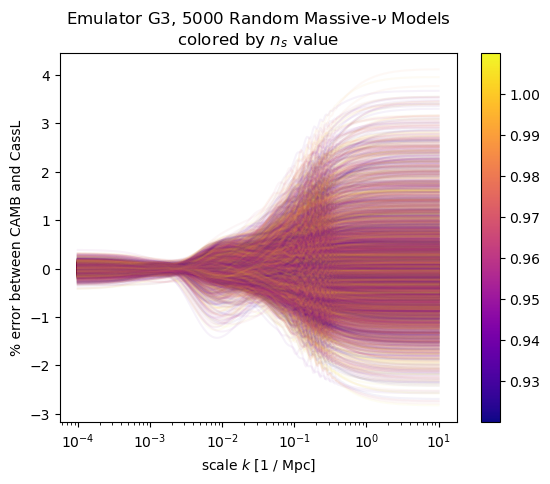

In [17]:
plot_colored_errors(2, r"$n_s$")

FileNotFoundError: [Errno 2] No such file or directory: '../plots/emulator/performance/_colored_by_As.png'

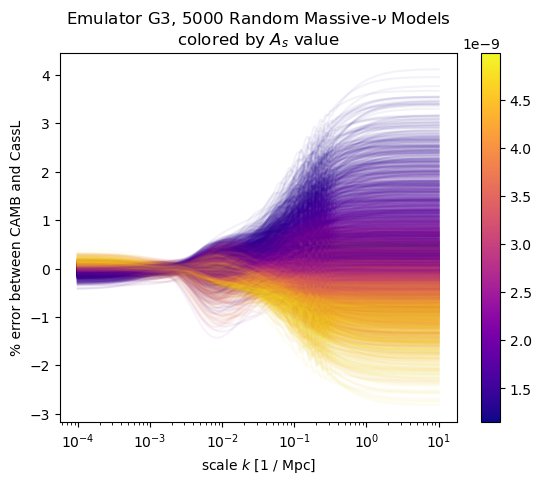

In [18]:
plot_colored_errors(4, r"$A_s$", "_colored_by_As")

FileNotFoundError: [Errno 2] No such file or directory: '../plots/emulator/performance/_colored_by_omnu.png'

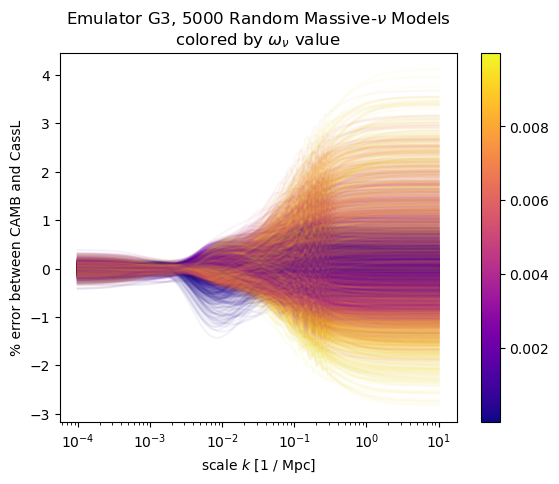

In [19]:
plot_colored_errors(5, r"$\omega_\nu$", "_colored_by_omnu")

In [ ]:
# Let's use the plasma color map
normalized_omc_vals = normalize(X[:, 1])
colors_omc = pb.cm.plasma(normalized_omc_vals)

for i in range(len(rel_errors)):
    if i % 1 == 0:
        pb.plot(scales, 100 * rel_errors[i],
            color=colors_omc[i], alpha=0.05)
        pb.xscale('log')
        
pb.title(r"Emulator G3, 5000 Random Massive-$\nu$ Models" "\n" 
        r"colored by $\omega_c$ value")
pb.ylabel("% error between CAMB and CassL")
pb.xlabel("scale $k$ [1 / Mpc]")
pb.colorbar(mpl.cm.ScalarMappable(cmap=pb.cm.plasma))
pb.savefig("../plots/emulator/performance/massive_5k_G6.png")

In [ ]:
for i in range(len(rel_errors)):
    if i % 1 == 0: # plot one out of every one hundred errors
        pb.plot(scales, 100 * rel_errors[i],
            color=pb.cm.plasma(X[i][0]), alpha=0.05)
        pb.xscale('log')
        
pb.title(r"Emulator G3, 5000 Random Massive-$\nu$ Models" "\n" 
        r"colored by $\omega_b$ value")
pb.ylabel("% error between CAMB and CassL")
pb.xlabel("scale $k$ [1 / Mpc]")

In [ ]:
for i in range(len(rel_errors)):
    if i % 1 == 0: # plot one out of every one hundred errors
        pb.plot(scales[:80], 100 * rel_errors[i][:80],
            color='blue', alpha=0.05)
        pb.xscale('log')
        
pb.title(r"Emulator G3, 5000 Random Massive-$\nu$ Models")
pb.ylabel("% error between CAMB and CassL")
pb.xlabel("scale $k$ [1 / Mpc]")
pb.savefig("../plots/emulator/performance/massive_5k_G6.png")